# Community Discovery 
* K-Clique
* Label Propagation
* Demon
* Angel


In [2]:
import warnings
import pandas as pd
import numpy as np
import cdlib
import networkx as nx
import matplotlib.pyplot as plt 
from cdlib import algorithms, evaluation, viz, ensemble
from collections import Counter

warnings.filterwarnings('ignore')


### Functions

In [3]:
list_size = []

In [10]:
def print_results(metodo, nome):
    '''Internal eval of communities'''
    print("Node coverage: ", metodo.node_coverage)
    print("Number of nodes: ", metodo.size())
    print("Average internal degree: ", metodo.average_internal_degree())
    print("Internal edge density: ", metodo.internal_edge_density())
    print("Conductance: ", metodo.conductance())
    print("Cut ratio: ", metodo.cut_ratio())
    print("Link modularity: ", metodo.link_modularity())
    
    list_size.append((nome, metodo.size(summary = False)))
    

def stampaCommunity (metodo):
    '''Print coms dimensions'''
    print("Comunita' totali: %d"%len(metodo.communities))
    nodes_l = []
    for i in metodo.communities:
        nodes_l += i
    nodes_l = list(set(nodes_l))
    print("Nodi: %d"%len(nodes_l))
    ù
    
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[1], l[2], weight=int(float(l[3].rstrip('\n'))))
    return g


def plot_boxplot(list_size):
    dati = []
    labels = []
    
    for i in range(len(list_size)):
        labels.append(list_size[i][0])
        dati.append(list_size[i][1])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(dati, labels=labels)
    
    
    plt.xlabel('Algoritmi')
    plt.ylabel("Size")
    plt.grid(axis='both', alpha=.3)
    plt.title("Boxplot size")
    plt.yscale("log")

    plt.show()

### Data import

In [5]:
df = pd.read_csv("../data_collection/data/df_nickname.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
g = read_net_w("../data_collection/data/df_nickname.csv")

## K-cliques

### Parameter tuning

* k – Size of smallest clique

In [8]:
n_k = ensemble.Parameter(name="k", start=2, end=10, step=1)

communities_k, scoring_k = ensemble.random_search(graph=g, method=algorithms.kclique,
                                              parameters=[n_k],
                                              quality_score=evaluation.erdos_renyi_modularity,
                                              instances = 3, aggregate=max)

print("Configuration: %s \nScoring: %s" %(communities_k.method_parameters, scoring_k))


Configuration: {'k': 2} 
Scoring: FitnessResult(min=None, max=None, score=0.4696379288696644, std=None)


### Algorithm

In [7]:
kclique_coms = algorithms.kclique(g, k=6)

In [7]:
kclique_coms.overlap 

True

### Evaluation

In [8]:
print_results(kclique_coms, "K-cliques")

Node coverage:  0.0007576475044985321
Number of nodes:  FitnessResult(min=8, max=23, score=13.333333333333334, std=6.847546194724712)
Average internal degree:  FitnessResult(min=6.25, max=8.695652173913043, score=7.204106280193237, std=1.068311640731015)
Internal edge density:  FitnessResult(min=0.3952569169960474, max=0.8928571428571429, score=0.7071491310621746, std=0.2218758449694481)
Conductance:  FitnessResult(min=0.441340782122905, max=0.5041322314049587, score=0.47666969866736353, std=0.026231044220958746)
Cut ratio:  FitnessResult(min=0.00011129634190236232, max=0.00013017443374121324, score=0.00012329060824776492, std=8.51207151227067e-06)
Link modularity:  FitnessResult(min=None, max=None, score=0.0002766867558366552, std=None)


## Label propagation

In [10]:
label_coms = algorithms.label_propagation(g)

In [11]:
label_coms.overlap

False

In [108]:
print_results(label_coms, "Label propagation")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=916, score=6.300871225683256, std=19.30429966705665)
Average internal degree:  FitnessResult(min=1.0, max=20.83582089552239, score=1.4050708321348455, std=0.7835020701132581)
Internal edge density:  FitnessResult(min=0.002283628033502756, max=1.0, score=0.6832459851846769, std=0.3207008168565289)
Conductance:  FitnessResult(min=0.0, max=0.9285714285714286, score=0.2390133634871359, std=0.2335127354159985)
Cut ratio:  FitnessResult(min=0.0, max=0.0002462447672986949, score=1.287068745038726e-05, std=1.8591388511278523e-05)
Link modularity:  FitnessResult(min=None, max=None, score=0.10980358531857101, std=None)


## Louvain con grafo con pesi

### Parameter tuning

In [12]:
resolution_lp = ensemble.Parameter(name="resolution", start=0.1, end=0.7, step=0.1)
randomize_lp = ensemble.BoolParameter(name="randomize")

communities_lp, scoring_lp = ensemble.random_search(graph=g, method=algorithms.louvain,
                                              parameters=[resolution_lp, randomize_lp],
                                              quality_score=evaluation.erdos_renyi_modularity,
                                              instances = 3, aggregate=max)

print("Configuration: %s \nScoring: %s" %(communities_lp.method_parameters, scoring_lp))


Configuration: {'weight': 'weight', 'resolution': 0.6, 'randomize': True} 
Scoring: FitnessResult(min=None, max=None, score=2.467906230559608e-05, std=None)


### Algorithm

In [103]:
louvain_coms = algorithms.louvain(g, resolution=0.8, randomize=True, weight = "weights")

In [104]:
louvain_coms.overlap

False

### Evaluation

In [105]:
print_results(louvain_coms, "Louvain")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=9097, score=16.08622790981109, std=191.45738456072698)
Average internal degree:  FitnessResult(min=1.0, max=18.151898734177216, score=1.347258374073941, std=0.8223023030464576)
Internal edge density:  FitnessResult(min=0.00034599729351079717, max=1.0, score=0.748102478383508, std=0.31085221467907526)
Conductance:  FitnessResult(min=0.0, max=0.19548872180451127, score=0.0032466350890698647, std=0.01847495771679614)
Cut ratio:  FitnessResult(min=0.0, max=9.399090818715035e-06, score=1.3319241685070917e-07, std=7.516898370933337e-07)
Link modularity:  FitnessResult(min=None, max=None, score=0.13664755571882573, std=None)


In [66]:
stampaCommunity(louvain_coms)

Comunita' totali: 3282
Nodi: 52795


# Louvain con grafo non pesato

In [25]:
louvain_coms_senzapesi = algorithms.louvain(g.to_undirected(), resolution=1., randomize=42)

In [26]:
louvain_coms_senzapesi.overlap

False

In [27]:
print_results(louvain_coms_senzapesi, "Louvain grafo non pesato")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=1, max=2, score=1.0000189415463878, std=0.004352147470579042)
Average internal degree:  FitnessResult(min=0.0, max=2.0, score=5.682463916354131e-05, std=0.009731623857281962)
Internal edge density:  FitnessResult(min=0, max=1.0, score=1.8941546387847104e-05, std=0.004352147470579042)
Conductance:  FitnessResult(min=0.9259259259259259, max=1.0, score=0.9999984606523719, std=0.00032389760479560175)
Cut ratio:  FitnessResult(min=1.8941546387847104e-05, max=0.0179755275220669, score=5.809903440319944e-05, std=0.00021064401968302096)
Link modularity:  FitnessResult(min=None, max=None, score=1.7850758441350195e-06, std=None)


# Demon

### Parameter Tuning

* epsilon – merging threshold in [0,1], default 0.25.
* min com dimension

In [ ]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.6, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

coms_demon, scoring = ensemble.random_search(graph=g, method=algorithms.demon,
                                                       parameters=[eps, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Configuration: %s \nScoring: %s" %(coms_demon.method_parameters, scoring))

### algorithm

In [16]:
demon_coms = algorithms.demon(g.to_undirected(), min_com_size=4, epsilon=0.5)

### evaluation

In [106]:
print_results(demon_coms, "Demon")

Node coverage:  0.06360450800265177
Number of nodes:  FitnessResult(min=5, max=87, score=25.743589743589745, std=15.394334536825218)
Average internal degree:  FitnessResult(min=2.8, max=18.772727272727273, score=5.512254816906037, std=3.0553170941086623)
Internal edge density:  FitnessResult(min=0.0582731889869019, max=0.8, score=0.29812937923408556, std=0.1713182037673018)
Conductance:  FitnessResult(min=0.0, max=0.9853777416734363, score=0.39572842943061204, std=0.28821541893495156)
Cut ratio:  FitnessResult(min=0.0, max=0.0038297119980804082, score=0.00021609334358590625, std=0.0004593777471230093)
Link modularity:  FitnessResult(min=None, max=None, score=0.017854397693585156, std=None)


# Angel


### Parameter Tuning 

* threshold – merging threshold in [0,1].


In [ ]:
threshold = ensemble.Parameter(name="threshold", start=0, end=1, step=0.1)
size = ensemble.Parameter(name="min_community_size", start=3, end=5,step=1)

coms_angel, scoring_angel = ensemble.random_search(graph=g, method=algorithms.angel,
                                                       parameters=[threshold, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Configuration: %s \nScoring: %s" %(coms_angel.method_parameters, scoring_angel))

### Algorithms

In [21]:
angel_coms = algorithms.angel(g.to_undirected(), min_community_size = 4, threshold=0.1)

### Evaluation

In [107]:
print_results(angel_coms, "Angel")

Node coverage:  0.06349086087697699
Number of nodes:  FitnessResult(min=5, max=284, score=31.839622641509433, std=33.30763887466013)
Average internal degree:  FitnessResult(min=1.75, max=18.444444444444443, score=5.396579084720981, std=2.8382262075727835)
Internal edge density:  FitnessResult(min=0.02806947693226497, max=0.7333333333333333, score=0.2621833223391592, std=0.16127573099950887)
Conductance:  FitnessResult(min=0.0, max=0.953125, score=0.27096054702162753, std=0.2307356107431143)
Cut ratio:  FitnessResult(min=0.0, max=0.0011872142711921944, score=7.498116194828148e-05, std=0.0001755039177498925)
Link modularity:  FitnessResult(min=None, max=None, score=0.019570464775790438, std=None)


## External evaluation

* size

In [35]:
stampaCommunity(louvain_coms)

Comunita' totali: 3258
Nodi: 52795


In [36]:
stampaCommunity(label_coms)

Comunita' totali: 8379
Nodi: 52795


In [37]:
stampaCommunity(kclique_coms)

Comunita' totali: 3
Nodi: 40


In [38]:
stampaCommunity(demon_coms)

Comunita' totali: 157
Nodi: 3359


In [39]:
stampaCommunity(angel_coms)

Comunita' totali: 106
Nodi: 3353


* Boxplot

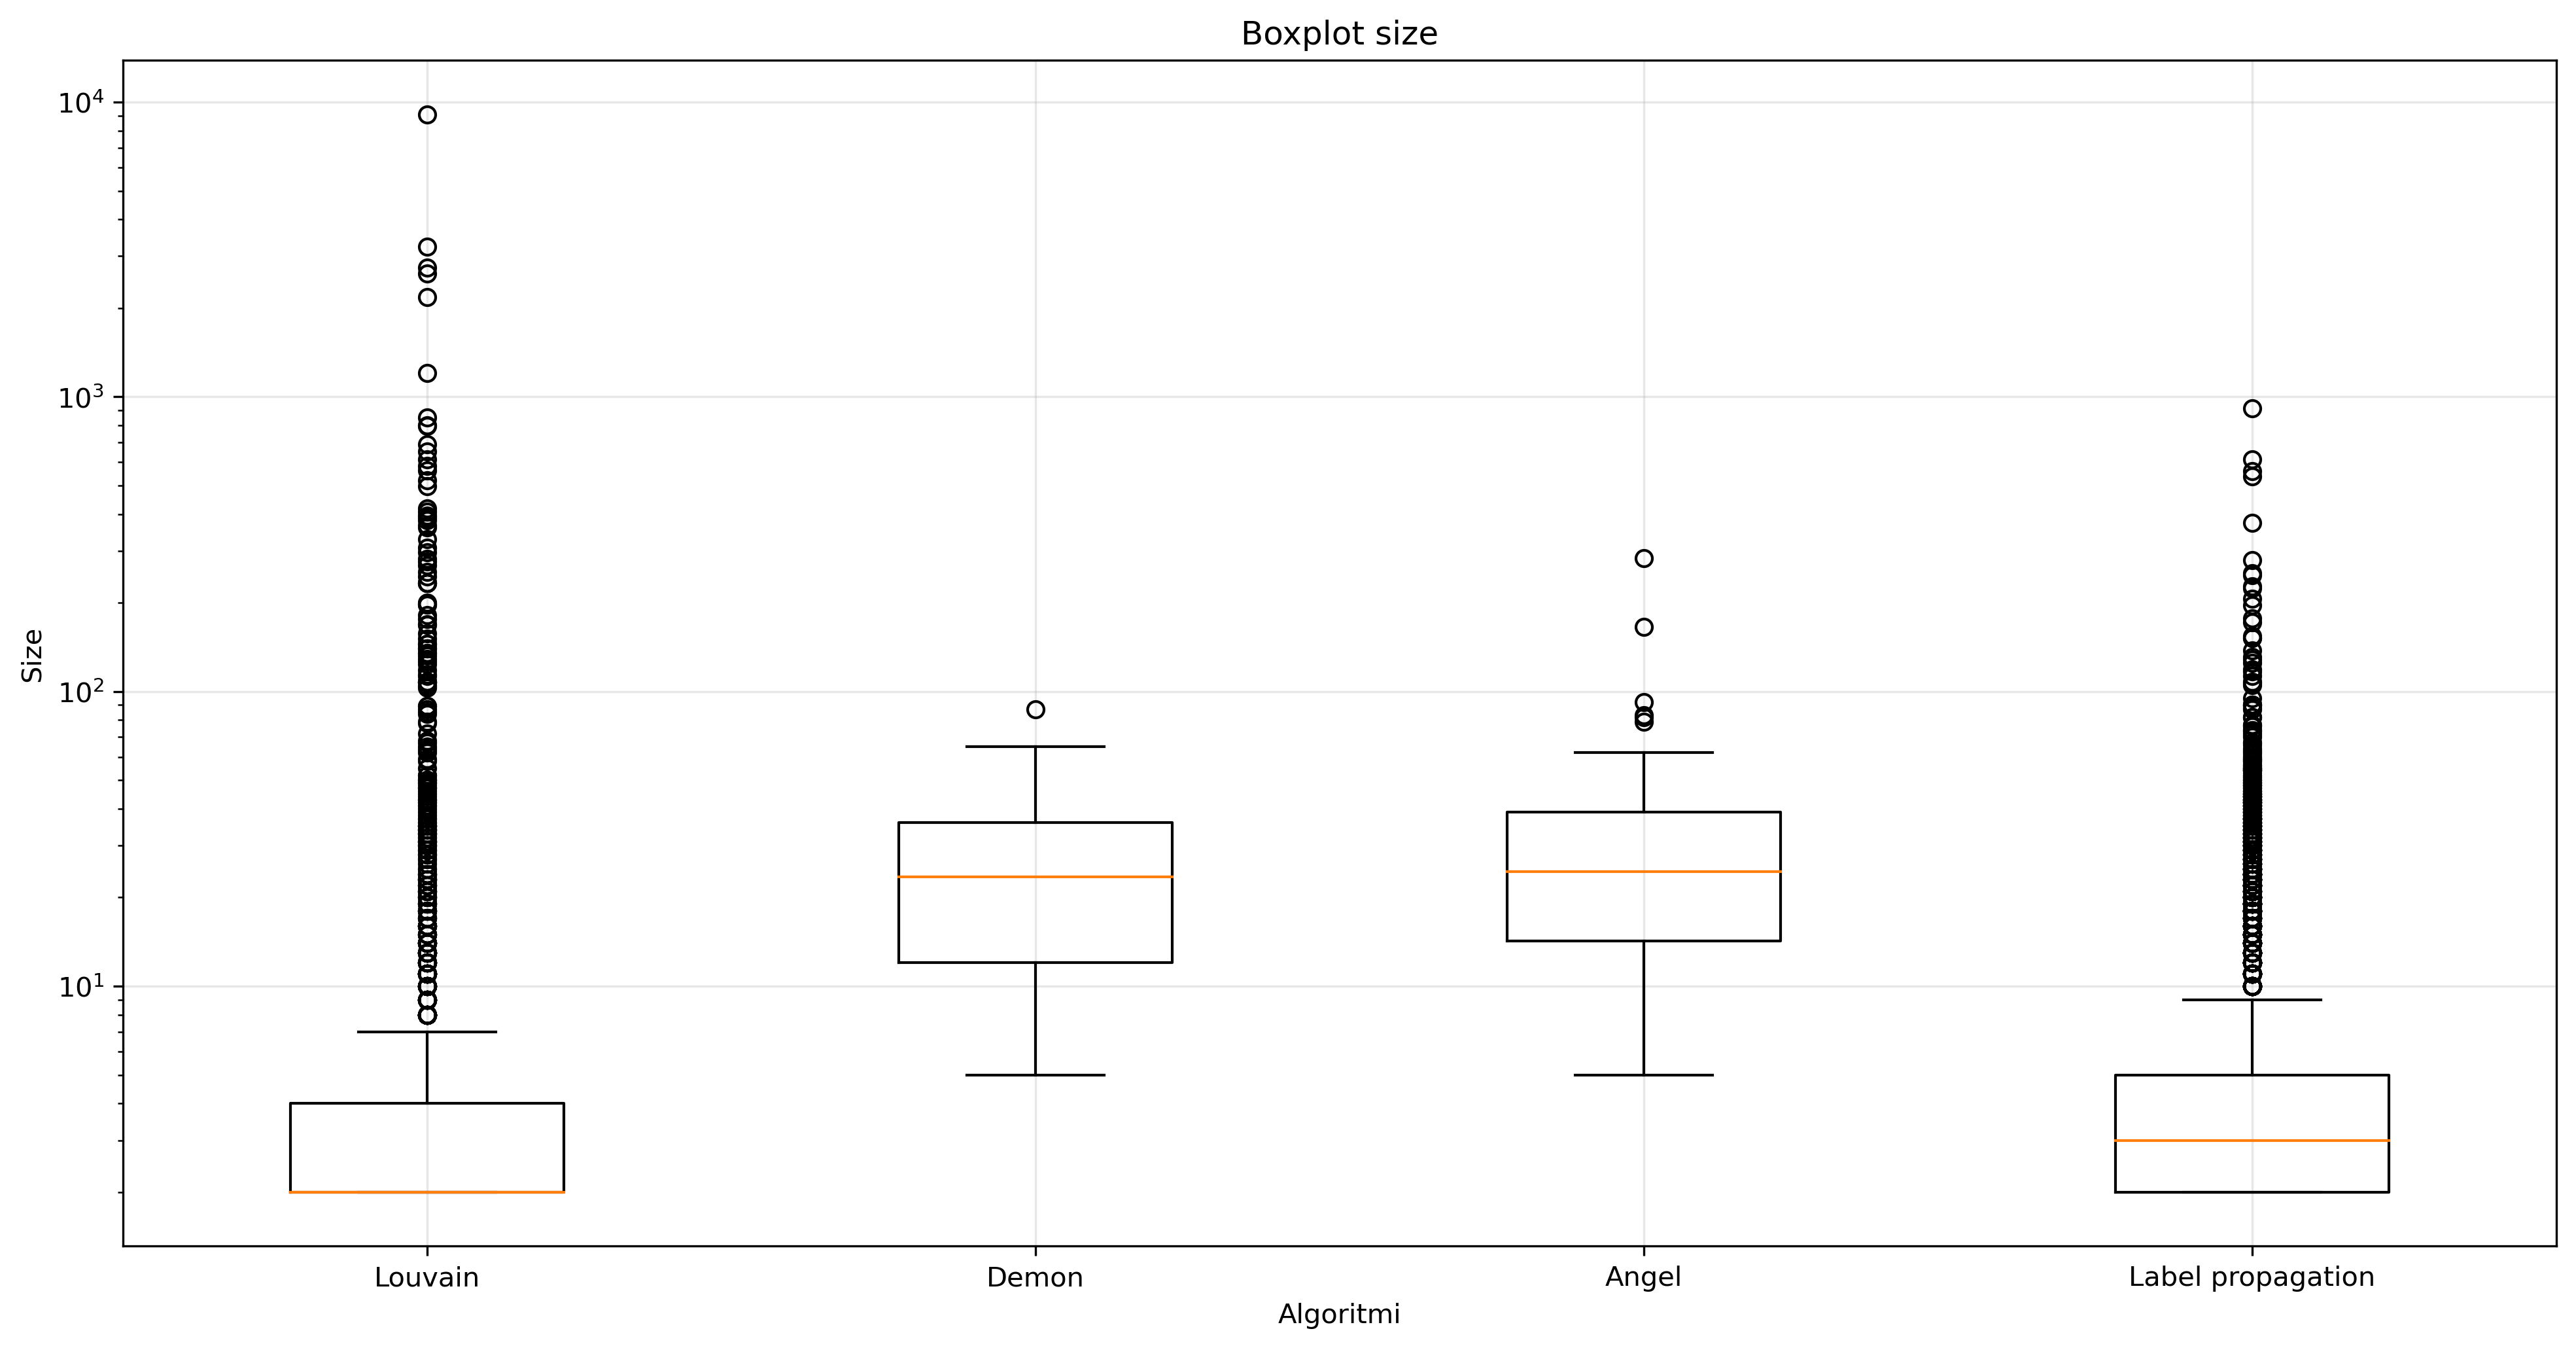

In [110]:
plot_boxplot(list_size)

* Evaluation: Sim. Matrix + NF1

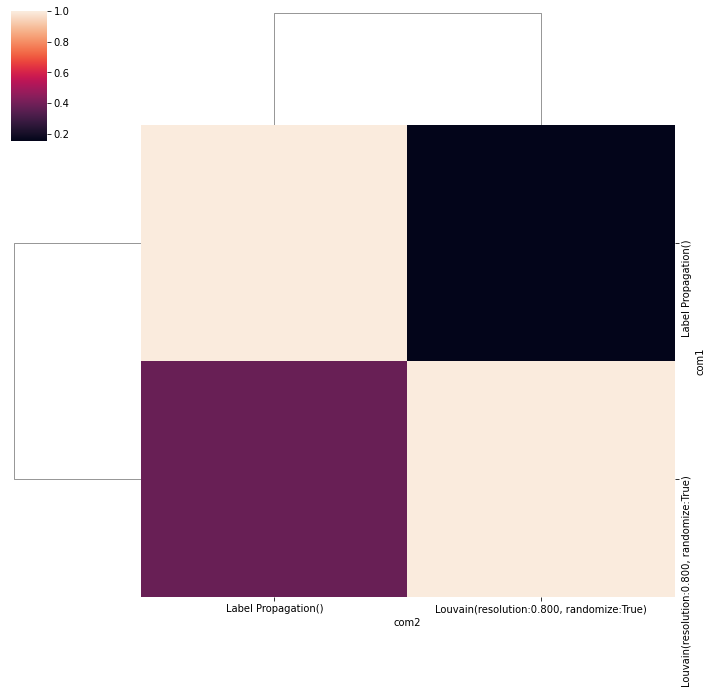

In [51]:
clustermap = viz.plot_sim_matrix([louvain_coms, label_coms],evaluation.nf1)

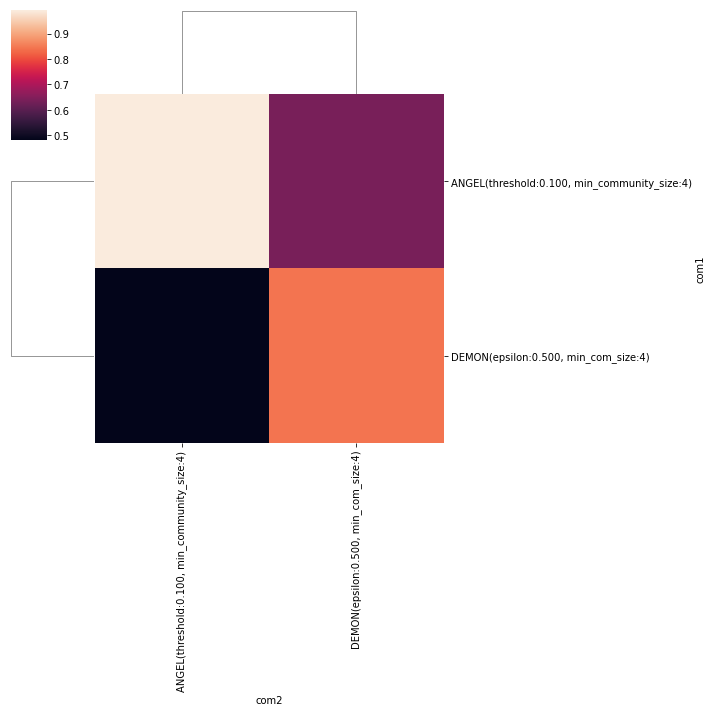

In [48]:
clustermap = viz.plot_sim_matrix([demon_coms, angel_coms],evaluation.nf1)

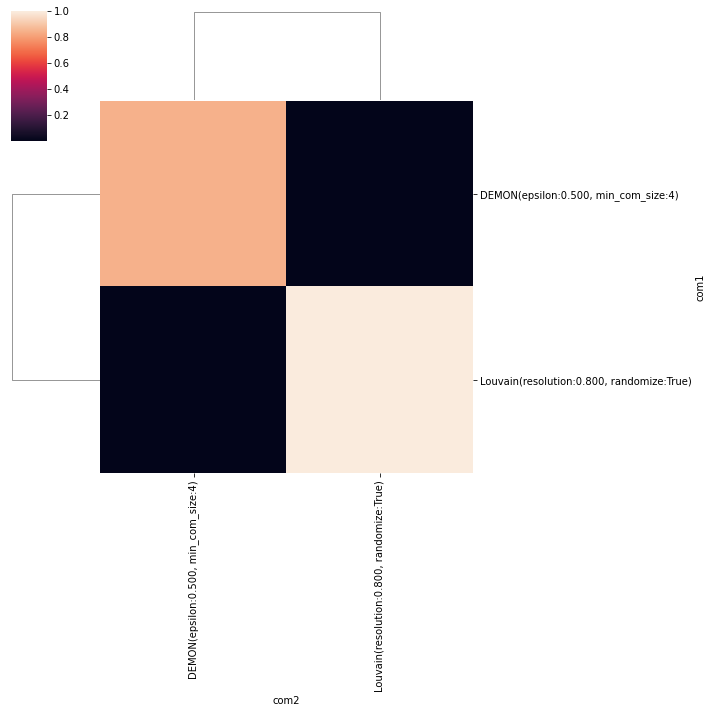

In [23]:
clustermap = viz.plot_sim_matrix([demon_coms, louvain_coms],evaluation.nf1)

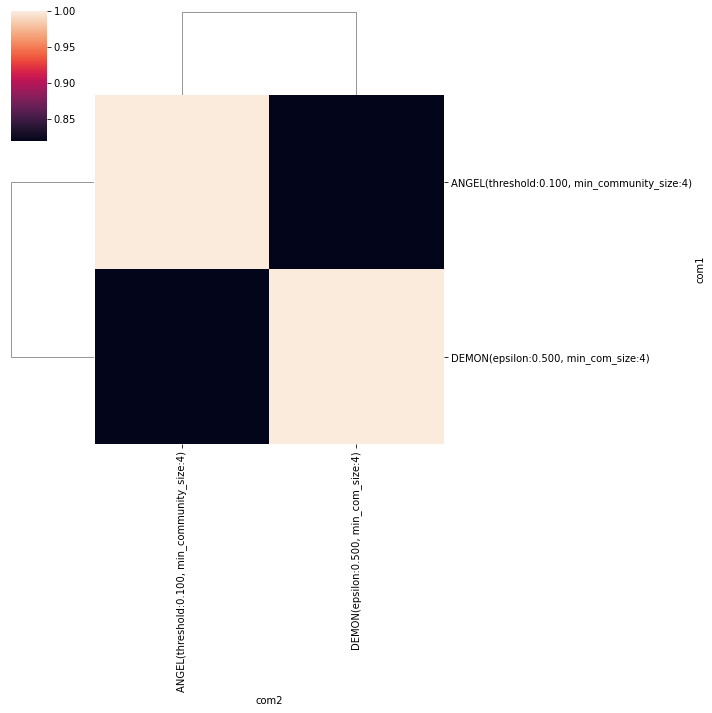

In [24]:
clustermap = viz.plot_sim_matrix([demon_coms, angel_coms],evaluation.overlapping_normalized_mutual_information_LFK)

* Evaluation: size + violin plot

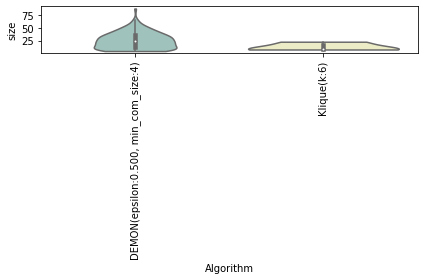

In [48]:
    violinplot = viz.plot_com_stat([demon_coms,kclique_coms],evaluation.size)

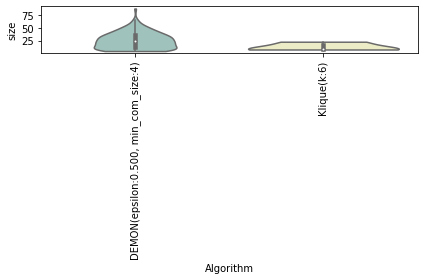

In [98]:
violinplot = viz.plot_com_stat([demon_coms,kclique_coms],evaluation.size)

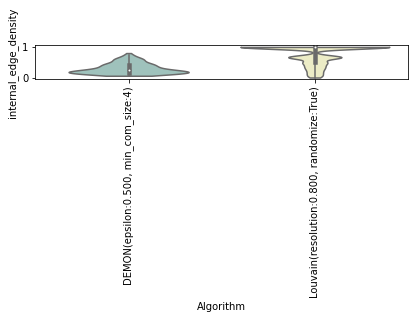

In [100]:
violinplot = viz.plot_com_stat([demon_coms, louvain_coms],evaluation.internal_edge_density)

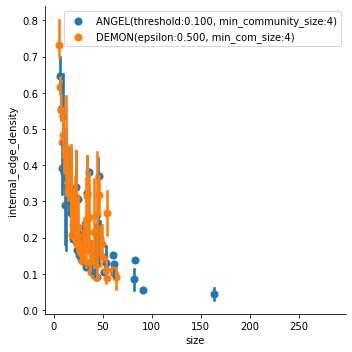

In [27]:
plot_prova = viz.plot_com_properties_relation([louvain_coms,demon_coms],evaluation.size,evaluation.internal_edge_density)


# Evaluation con NMI

In [58]:
louvain_coms.normalized_mutual_information(label_coms)

MatchingResult(score=0.7867608629787328, std=None)

* External evaluation: NF1 score

In [84]:
kclique_coms.nf1(label_coms)

MatchingResult(score=0.010692405578196834, std=None)

In [85]:
kclique_coms.nf1(louvain_coms)

MatchingResult(score=0.015719894049758768, std=None)

In [86]:
kclique_coms.nf1(demon_coms)

MatchingResult(score=0.42982078853046596, std=None)

In [87]:
kclique_coms.nf1(louvain_coms_senzapesi)

MatchingResult(score=0.015655567117585846, std=None)

In [88]:
louvain_coms.nf1(label_coms)

MatchingResult(score=0.011679709298552983, std=None)

In [89]:
louvain_coms_senzapesi.nf1(label_coms)

MatchingResult(score=0.013630935886131755, std=None)

In [90]:
label_coms.nf1(demon_coms)

MatchingResult(score=0.0018778076449952165, std=None)

In [91]:
demon_coms.nf1(louvain_coms)

MatchingResult(score=0.022486979166666664, std=None)

In [92]:
demon_coms.nf1(louvain_coms_senzapesi)

MatchingResult(score=0.021756089154411764, std=None)

In [ ]:
clustermap = viz.plot_sim_matrix([louvain_coms, label_coms],evaluation.adjusted_mutual_information)

# Export of Louvain communities

In [67]:
from cdlib import readwrite


In [68]:
readwrite.write_community_csv(louvain_coms, "../data_collection/data/CD_louvain.csv", ",")

In [140]:
readwrite.write_community_csv(demon_coms, "../data_collection/data/CD_demon.csv", ",")

In [147]:
df_coms = pd.read_csv("../data_collection/data/CD_demon.csv")

In [86]:
df_coms = pd.read_csv("../data_collection/data/CD_louvain.csv")

In [87]:
df_coms_filtered = df_coms.iloc[0:125] 

In [88]:
df_coms_T = df_coms_filtered.transpose()

In [89]:
df_coms_T

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
info4u2know,JoeBiden,PPVSRB,cnkamngo,whok95,patricklillis2,djblackzitoun,spicoli_69,piersmorgan,jean46055280,maxwelllongsha1,...,rename_u,insane_voice,itsraychellrose,darlingchn,educatorwalker,c4fernandez,fruitytomaz,iamgtf,titaniabird,indydevoe
thehill,KamalaHarris,armada_jasonv,pabiedu1,ladya,MayorofLondon,PetalsTm,NFL,erberriez,squawk7kdotnet,JoeBriggsEsq,...,univmiami,SimonPearson961,Da_Mysterious_Q,chanlix,EducatorShorts,nataliearley,wtfmarcy,YoungMace22,notyourguts,cpearsall
soloyochapin,jenniferclmn,katibug817,LindaT_G,ayrinweloveyou,protest_nyc,Wewillrocku66,XXL,ProtestAccess,_ratioed_rebel,MatthewACherry,...,julio_frenk,dense_evi,Daley_Kong,candylino,EReedSpeaks,yourgirlvicks,roobxs,tallguy951,misskittyf,WhyKelly2
realDonaldTrump,redwood75746520,nathaliejacoby1,ABlinken,TMZ,willireallyam1,insaurraldeh,capnamerica18,nowthisnews,LFC,412champs,...,MiamiLawSchool,cheryl1492,DebGuerrieri,JisungsVoices,DrADM75,sarahgogs,trouxaexistindo,mavus15,TheGreatSG,ThePeteEffect
joseph2482f,ABC,sweet_iced_T,meklittn,PopCrave,cute_ares,RosaTrunk,arimek29,karinapdx,jetcitystar,considerthecash,...,umiamimedicine,ammocrypta,DirtyAndyDalton,Iev9nter,Doewhitbit,robbiefellover,supereigncorp,lakeshow_wess,Rosen_Thorne,StauferTrish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mrtweeterverse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrthollo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrsmud1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrshhjones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_coms = df_coms_T.rename_axis('community_0').reset_index()

In [91]:
df_coms

,community_0,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,info4u2know,JoeBiden,PPVSRB,cnkamngo,whok95,patricklillis2,djblackzitoun,spicoli_69,piersmorgan,jean46055280,...,rename_u,insane_voice,itsraychellrose,darlingchn,educatorwalker,c4fernandez,fruitytomaz,iamgtf,titaniabird,indydevoe
1,thehill,KamalaHarris,armada_jasonv,pabiedu1,ladya,MayorofLondon,PetalsTm,NFL,erberriez,squawk7kdotnet,...,univmiami,SimonPearson961,Da_Mysterious_Q,chanlix,EducatorShorts,nataliearley,wtfmarcy,YoungMace22,notyourguts,cpearsall
2,soloyochapin,jenniferclmn,katibug817,LindaT_G,ayrinweloveyou,protest_nyc,Wewillrocku66,XXL,ProtestAccess,_ratioed_rebel,...,julio_frenk,dense_evi,Daley_Kong,candylino,EReedSpeaks,yourgirlvicks,roobxs,tallguy951,misskittyf,WhyKelly2
3,realDonaldTrump,redwood75746520,nathaliejacoby1,ABlinken,TMZ,willireallyam1,insaurraldeh,capnamerica18,nowthisnews,LFC,...,MiamiLawSchool,cheryl1492,DebGuerrieri,JisungsVoices,DrADM75,sarahgogs,trouxaexistindo,mavus15,TheGreatSG,ThePeteEffect
4,joseph2482f,ABC,sweet_iced_T,meklittn,PopCrave,cute_ares,RosaTrunk,arimek29,karinapdx,jetcitystar,...,umiamimedicine,ammocrypta,DirtyAndyDalton,Iev9nter,Doewhitbit,robbiefellover,supereigncorp,lakeshow_wess,Rosen_Thorne,StauferTrish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,mrtweeterverse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4502,mrthollo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4503,mrsmud1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4504,mrshhjones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
lista_nomi_colonne = []

In [93]:
for i in range(len(df_coms.columns)):
    stringa_nome_col = "community_" + str(i)
    lista_nomi_colonne.append(stringa_nome_col)

In [94]:
df_coms.columns = lista_nomi_colonne

In [95]:
df_coms

,community_0,community_1,community_2,community_3,community_4,community_5,community_6,community_7,community_8,community_9,...,community_116,community_117,community_118,community_119,community_120,community_121,community_122,community_123,community_124,community_125
0,info4u2know,JoeBiden,PPVSRB,cnkamngo,whok95,patricklillis2,djblackzitoun,spicoli_69,piersmorgan,jean46055280,...,rename_u,insane_voice,itsraychellrose,darlingchn,educatorwalker,c4fernandez,fruitytomaz,iamgtf,titaniabird,indydevoe
1,thehill,KamalaHarris,armada_jasonv,pabiedu1,ladya,MayorofLondon,PetalsTm,NFL,erberriez,squawk7kdotnet,...,univmiami,SimonPearson961,Da_Mysterious_Q,chanlix,EducatorShorts,nataliearley,wtfmarcy,YoungMace22,notyourguts,cpearsall
2,soloyochapin,jenniferclmn,katibug817,LindaT_G,ayrinweloveyou,protest_nyc,Wewillrocku66,XXL,ProtestAccess,_ratioed_rebel,...,julio_frenk,dense_evi,Daley_Kong,candylino,EReedSpeaks,yourgirlvicks,roobxs,tallguy951,misskittyf,WhyKelly2
3,realDonaldTrump,redwood75746520,nathaliejacoby1,ABlinken,TMZ,willireallyam1,insaurraldeh,capnamerica18,nowthisnews,LFC,...,MiamiLawSchool,cheryl1492,DebGuerrieri,JisungsVoices,DrADM75,sarahgogs,trouxaexistindo,mavus15,TheGreatSG,ThePeteEffect
4,joseph2482f,ABC,sweet_iced_T,meklittn,PopCrave,cute_ares,RosaTrunk,arimek29,karinapdx,jetcitystar,...,umiamimedicine,ammocrypta,DirtyAndyDalton,Iev9nter,Doewhitbit,robbiefellover,supereigncorp,lakeshow_wess,Rosen_Thorne,StauferTrish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,mrtweeterverse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4502,mrthollo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4503,mrsmud1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4504,mrshhjones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
df_coms.to_csv("../data_collection/data/Community_Louvain.csv",  index=False)

In [97]:
df_coms["community_125"].isna().sum()

4464